https://www.kaggle.com/neuromusic/avocado-prices

Some relevant columns in the dataset:

    Date - The date of the observation
    AveragePrice - the average price of a single avocado
    type - conventional or organic
    year - the year
    Region - the city or region of the observation
    Total Volume - Total number of avocados sold
    4046 - Total number of avocados with PLU 4046 sold (Small)
    4225 - Total number of avocados with PLU 4225 sold (Large)
    4770 - Total number of avocados with PLU 4770 sold (All Sizes)


In [310]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.io as pio
import scipy.stats as stats
from statistics import mean 
from scipy.stats.mstats import winsorize
import warnings

%matplotlib inline

pd.options.display.max_columns = None

warnings.filterwarnings('ignore')
df = pd.read_csv('data/avocado.csv',  low_memory=False)

title_style = {'family': 'DejaVu Sans', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'DejaVu Sans', 'color': 'darkblue', 'size': 15 }

In [311]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [312]:
df=df.drop(["Unnamed: 0"],axis=1)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [314]:
df['Date']=pd.to_datetime(df["Date"])
df['year']=pd.to_datetime(df["year"])


In [315]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [316]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  datetime64[ns]
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
dtypes: datetime64[ns](2), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


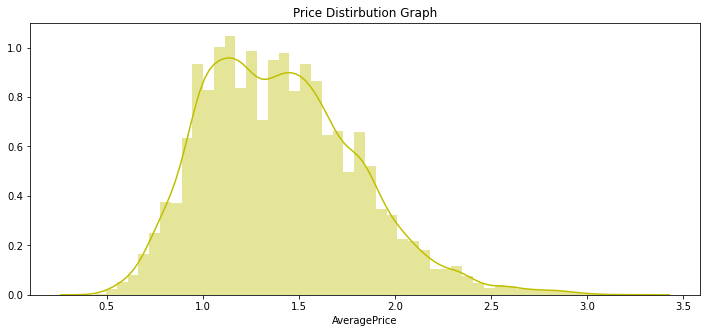

In [317]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(df["AveragePrice"], color = 'y')

Text(0.5, 1.0, 'Average Price')

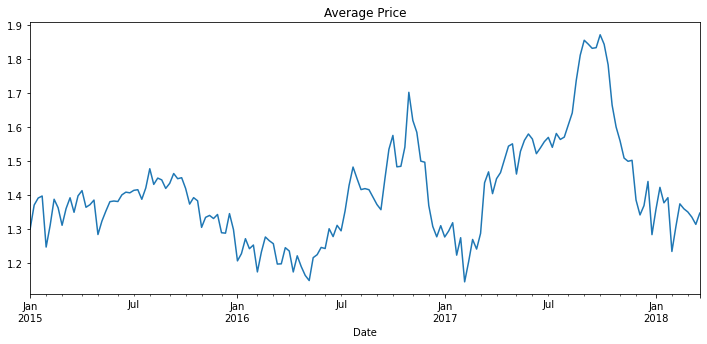

In [318]:
dategroup=df.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=df.Date)
plt.title('Average Price')

Gün içinde farklı bölgelere farklı fiyatlarla satışlar yapılmakta.

In [319]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,1970-01-01 00:00:00.000002015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,1970-01-01 00:00:00.000002015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,1970-01-01 00:00:00.000002015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,1970-01-01 00:00:00.000002015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,1970-01-01 00:00:00.000002015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1


#### Günlük organik avokadoların ortalama fiyat dağılımına bakalım

In [320]:
df=df[df["type"]=="organic"]

In [321]:
dategroup=df.groupby('Date').mean()

In [322]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1


In [323]:
df['Date'] = pd.DatetimeIndex(df['Date'])

In [324]:

from fbprophet import Prophet

df2 = df.loc[:, ["Date","AveragePrice"]]
df2.dtypes


Date            datetime64[ns]
AveragePrice           float64
dtype: object

In [325]:


df2 = df2.rename(columns={'Date': 'ds',
                        'AveragePrice': 'y'})



In [326]:
df2

,ds,y
9126,2015-12-27,1.83
9127,2015-12-20,1.89
9128,2015-12-13,1.85
9129,2015-12-06,1.84
9130,2015-11-29,1.94
...,...,...
18244,2018-02-04,1.63
18245,2018-01-28,1.71
18246,2018-01-21,1.87
18247,2018-01-14,1.93


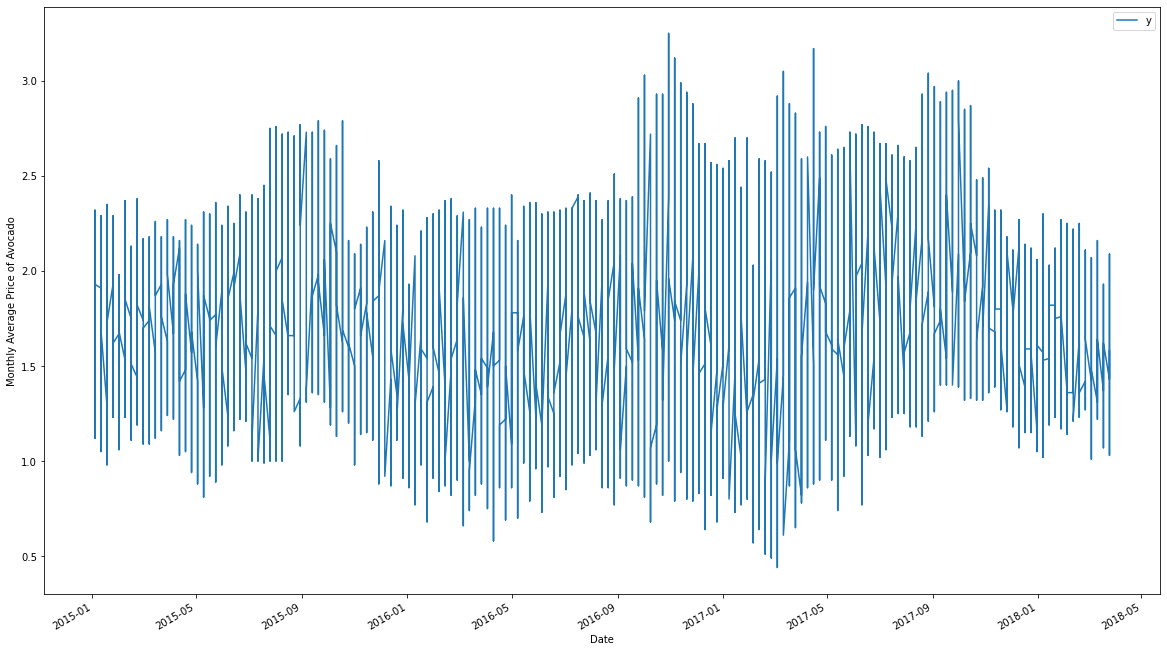

In [327]:
ax = df2.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')

plt.show()


In [328]:
my_model = Prophet()
my_model.fit(df2)

future_dates = my_model.make_future_dataframe(periods=900) # Int number of periods to forecast forward.
forecast =my_model.predict(future_dates)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


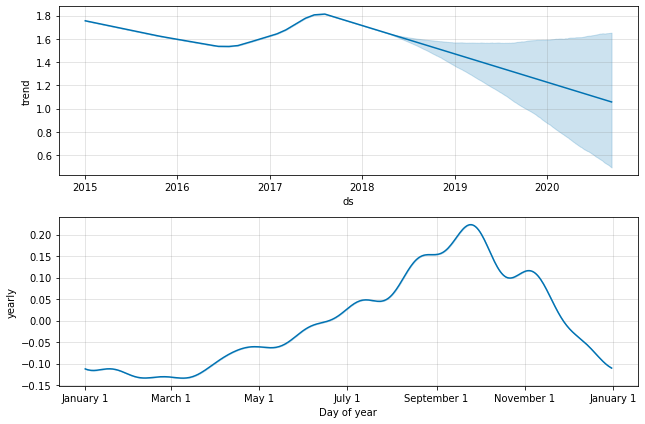

In [329]:
fig2 = my_model.plot_components(forecast)

In [330]:
future_dates.sort_values(by="ds")

,ds
0,2015-01-04
1,2015-01-11
2,2015-01-18
3,2015-01-25
4,2015-02-01
...,...
1064,2020-09-06
1065,2020-09-07
1066,2020-09-08
1067,2020-09-09


In [331]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.755705,1.220814,2.074615,1.755705,1.755705,-0.114898,-0.114898,-0.114898,-0.114898,-0.114898,-0.114898,0.0,0.0,0.0,1.640807
1,2015-01-11,1.752518,1.171461,2.117307,1.752518,1.752518,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,-0.114669,0.0,0.0,0.0,1.637848
2,2015-01-18,1.749331,1.223079,2.083849,1.749331,1.749331,-0.112029,-0.112029,-0.112029,-0.112029,-0.112029,-0.112029,0.0,0.0,0.0,1.637302
3,2015-01-25,1.746143,1.177333,2.044612,1.746143,1.746143,-0.116088,-0.116088,-0.116088,-0.116088,-0.116088,-0.116088,0.0,0.0,0.0,1.630055
4,2015-02-01,1.742956,1.198689,2.062154,1.742956,1.742956,-0.125612,-0.125612,-0.125612,-0.125612,-0.125612,-0.125612,0.0,0.0,0.0,1.617344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,2020-09-06,1.059987,0.479773,1.985757,0.500226,1.652323,0.160752,0.160752,0.160752,0.160752,0.160752,0.160752,0.0,0.0,0.0,1.220738
1065,2020-09-07,1.059318,0.528972,1.961230,0.498377,1.652566,0.163342,0.163342,0.163342,0.163342,0.163342,0.163342,0.0,0.0,0.0,1.222659
1066,2020-09-08,1.058649,0.502328,1.932336,0.497727,1.652807,0.166358,0.166358,0.166358,0.166358,0.166358,0.166358,0.0,0.0,0.0,1.225007
1067,2020-09-09,1.057981,0.506224,1.968301,0.495401,1.653048,0.169780,0.169780,0.169780,0.169780,0.169780,0.169780,0.0,0.0,0.0,1.227761


In [332]:
#    yhat: forecast
#    yhat_lower, yhat_upper: uncertainty interval


In [333]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)


In [334]:
forecastnew

,ds,yhat
0,2015-01-04,1.640807
1,2015-01-11,1.637848
2,2015-01-18,1.637302
3,2015-01-25,1.630055
4,2015-02-01,1.617344
...,...,...
1064,2020-09-06,1.220738
1065,2020-09-07,1.222659
1066,2020-09-08,1.225007
1067,2020-09-09,1.227761


In [335]:

mask = (forecastnew['ds'] > "2018-03-24") & (forecastnew['ds'] <= "2020-12-10")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2015-01-04") & (forecastnew['ds'] <= "2018-03-25")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


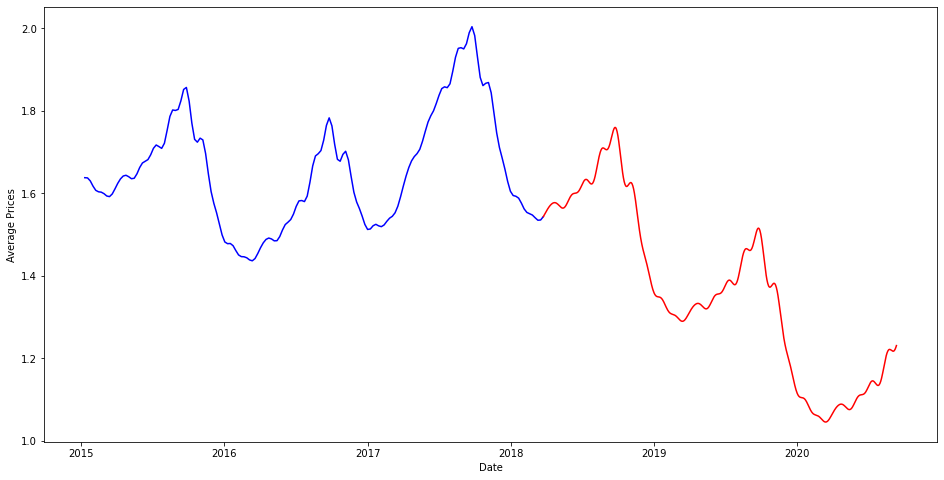

In [336]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

### RNN

In [345]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1


In [346]:
from sklearn.preprocessing import MinMaxScaler



In [347]:
df = pd.read_csv('data/avocado.csv',  low_memory=False)
df=df.drop(["Unnamed: 0"],axis=1)
df['Date']=pd.to_datetime(df["Date"])
df['year']=pd.to_datetime(df["year"])
df['Month'] = pd.DatetimeIndex(df['Date']).month
df=df[df["type"]=="organic"]
dategroup=df.groupby('Date').mean()

In [348]:

input_data = dategroup.iloc[:,[2,1]].values


In [349]:


from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_data[:,:])



In [350]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
9126,2015-12-27,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9127,2015-12-20,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9128,2015-12-13,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9129,2015-12-06,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,1970-01-01 00:00:00.000002015,Albany,12
9130,2015-11-29,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,1970-01-01 00:00:00.000002015,Albany,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,1970-01-01 00:00:00.000002018,WestTexNewMexico,1


In [351]:

input_data.shape

(169, 2)

In [354]:
dategroup.shape

(169, 10)

In [168]:
input_data

array([[0.36176231, 0.24562012],
       [0.31059439, 0.19099875],
       [0.32980103, 0.1895077 ],
       [0.34219589, 0.17234513],
       [0.7859565 , 0.55609841],
       [0.41166212, 0.26344568],
       [0.37942797, 0.16494342],
       [0.38248423, 0.21171243],
       [0.43121328, 0.28811812],
       [0.40210858, 0.21533312],
       [0.41124881, 0.20100629],
       [0.43954675, 0.26947342],
       [0.36668673, 0.21142067],
       [0.45751981, 0.24623382],
       [0.50621467, 0.26112094],
       [0.47719472, 0.28581001],
       [0.45482373, 0.23794258],
       [0.72299969, 0.4877036 ],
       [0.60924755, 0.37238215],
       [0.49787585, 0.26082007],
       [0.59257601, 0.34089024],
       [0.56400419, 0.30561794],
       [0.62674415, 0.36867218],
       [0.61879212, 0.38023651],
       [0.51181298, 0.34978086],
       [0.41706876, 0.26881579],
       [0.57463155, 0.40115553],
       [0.35506769, 0.24993739],
       [0.38368793, 0.26760135],
       [0.34671734, 0.22451623],
       [0.

In [355]:

lookback= 50

test_size=int(.3 * len(dategroup))
X=[]
y=[]
for i in range(len(dategroup)-lookback-1):
    t=[]
    for j in range(0,lookback):
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])



In [356]:
print(X[1][-1])
print(y[0])
print("-----------")
print(X[100][-1])
print(y[99])


[[0.05350764 0.02470344]]
0.024703438311247772
-----------
[[0.05461969 0.3956286 ]]
0.39562860155250007


In [357]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)


(118, 50, 2)
(100, 50, 2)


In [358]:


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM



In [359]:
X.shape[1],2

(50, 2)

In [360]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True)),
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))

model.add(Dense(units=1))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 50, 30)            3960      
_________________________________________________________________
lstm_11 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_12 (LSTM)               (None, 50, 30)            7320      
_________________________________________________________________
lstm_13 (LSTM)               (None, 30)                7320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 25,951
Trainable params: 25,951
Non-trainable params: 0
_________________________________________________________________


In [361]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [362]:
model.fit(X, y, epochs=300, verbose=0)

In [363]:
predictions= model.predict(X_test)

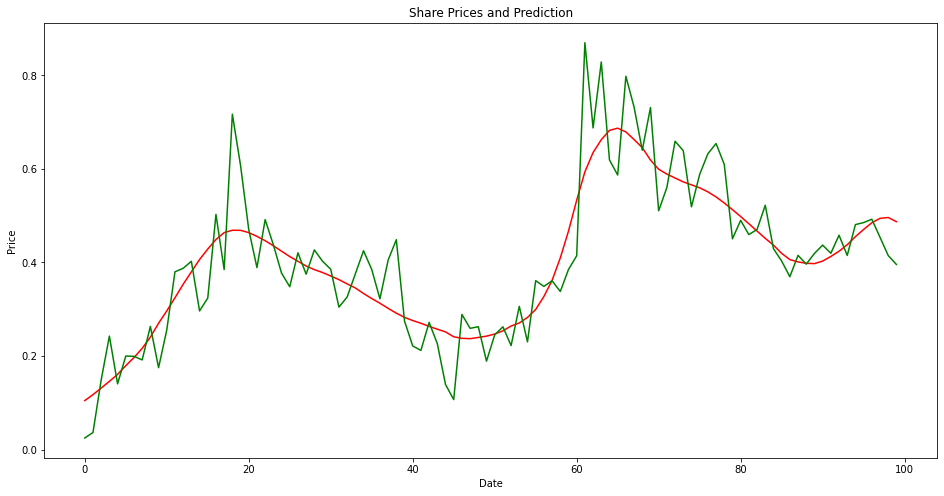

In [368]:

fig, ax1 = plt.subplots(figsize=(16, 8))

plt.plot(predictions, color= 'red')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()



In [386]:
predictions= model.predict(X)

In [400]:
predictions.shape


(118, 1)

In [407]:
arr=[]
for i in range(lookback):
    null=[]
    null.append(None)
    arr.append(null)
for i in range(len(predictions)):
    p=[]
    p.append(predictions[i,0])
    arr.append(p)

In [408]:
arr=np.array(arr)

In [409]:
arr.shape

(168, 1)

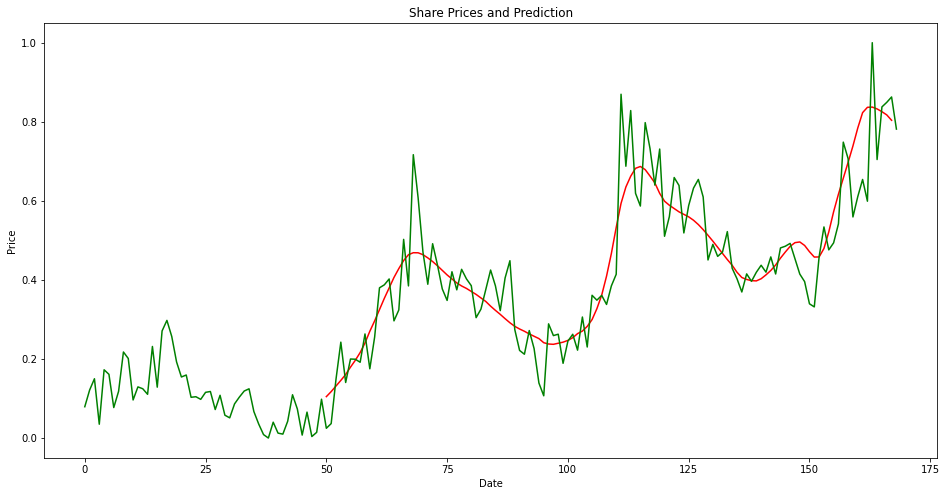

In [410]:

fig, ax1 = plt.subplots(figsize=(16, 8))

plt.plot(arr, color= 'red')
plt.plot(input_data[:,1], color='green')
plt.title("Share Prices and Prediction")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

